# import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
df =pd.read_csv('car_price.csv')

In [3]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


# data cleaning

In [5]:
df.eq(0).sum()

make_model        0
body_type         0
Body Color        0
km              235
hp                0
Gearing Type      0
Extras            0
price             0
dtype: int64

<AxesSubplot:>

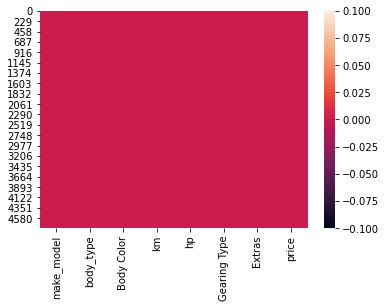

In [6]:
sns.heatmap(df.isnull())

# feature engineering

In [7]:
df.columns

Index(['make_model', 'body_type', 'Body Color', 'km', 'hp', 'Gearing Type',
       'Extras', 'price'],
      dtype='object')

In [8]:
df['make_model'].unique()

array(['Audi A1', 'Audi A2', 'Audi A3'], dtype=object)

In [9]:
df['body_type'].unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Other', 'Off-Road',
       'Convertible'], dtype=object)

In [10]:
df['Body Color'].unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver',
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange'],
      dtype=object)

In [11]:
df['Gearing Type'].unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [12]:
def updateModel(val):
    if val == 'Audi A1':
        return 0
    elif val == 'Audi A2':
        return 1
    elif val == 'Audi A3':
        return 2

In [13]:
df['model dummy'] = df['make_model'].apply(updateModel)

In [14]:
def updateBodyType(val):
    if val == 'Sedans':
        return 0
    elif val == 'Station wagon':
        return 1
    if val == 'Compact':
        return 2
    elif val == 'Coupe':
        return 3
    if val == 'Other':
        return 4
    elif val == 'Off-Road':
        return 5
    if val == 'Convertible':
        return 6
    

In [15]:
df['body type dummy'] = df['body_type'].apply(updateBodyType) 

In [16]:
def updateGearingType(val):
    if val == 'Automatic':
        return 0
    elif val == 'Manual':
        return 1
    if val == 'Semi-automatic':
        return 2

In [17]:
df['gearing type dummy'] = df['Gearing Type'].apply(updateGearingType) 

In [18]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price,model dummy,body type dummy,gearing type dummy
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770,0,0,0
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,0,0,0
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640,0,0,0
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500,0,0,0
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,0,0,0


# eda

In [19]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price,model dummy,body type dummy,gearing type dummy
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770,0,0,0
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,0,0,0
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640,0,0,0
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500,0,0,0
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,0,0,0


In [20]:
df.corr()

,km,hp,price,model dummy,body type dummy,gearing type dummy
km,1.000000,NaN,-0.584079,0.212158,-0.038215,0.116149
hp,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.584079,NaN,1.000000,0.241651,-0.071345,-0.179262
model dummy,0.212158,NaN,0.241651,1.000000,-0.320638,0.042816
body type dummy,-0.038215,NaN,-0.071345,-0.320638,1.000000,-0.021144
gearing type dummy,0.116149,NaN,-0.179262,0.042816,-0.021144,1.000000


<AxesSubplot:>

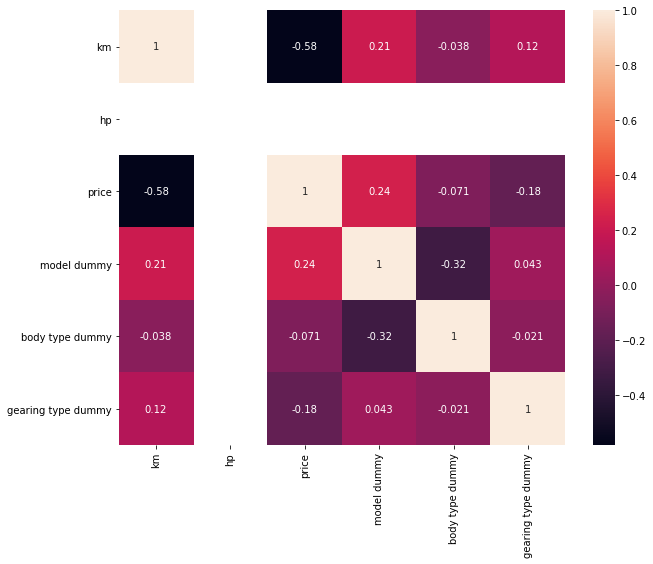

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Train Test Split

In [22]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price,model dummy,body type dummy,gearing type dummy
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770,0,0,0
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,0,0,0
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640,0,0,0
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500,0,0,0
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,0,0,0


In [23]:
df.isnull().sum()

make_model            0
body_type             0
Body Color            0
km                    0
hp                    0
Gearing Type          0
Extras                0
price                 0
model dummy           0
body type dummy       0
gearing type dummy    0
dtype: int64

In [25]:
X = df[['km', 'hp', 'model dummy', 'body type dummy', 'gearing type dummy']]
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
lr.intercept_

20770.001308348146

In [32]:
lr.coef_

array([-7.89614184e-02, -2.27373675e-12,  1.75209577e+03,  1.94713538e+02,
       -8.39944227e+02])

In [33]:
lr.score(X_test,y_test)

0.5117625087118365

In [34]:
predictions = lr.predict(X_test)

In [35]:
predictions

array([19012.60436101, 24267.87592701, 20910.27849337, ...,
       23434.24861366, 16354.43089483, 22802.55726637])

In [36]:
y_test

808     14780
4422    24900
3049    18900
4006    21299
4670    21978
        ...  
2697    13280
314     14990
4684    23289
2341    16900
4762    25490
Name: price, Length: 1440, dtype: int64

In [37]:
mse=metrics.mean_squared_error(y_test,predictions)

In [38]:
mse

8947073.386739474

In [39]:
np.sqrt(mse)

2991.1658908759096

In [40]:
df['price'].mean()

19722.871875

In [41]:
import pickle

In [42]:
pickle.dump(lr,open("car prediction model.pkl","wb"))

In [43]:
car_prediction=pickle.load(open ("car prediction model.pkl","rb"))

In [44]:
X

,km,hp,model dummy,body type dummy,gearing type dummy
0,56013,85,0,0,0
1,80000,85,0,0,0
2,83450,85,0,0,0
3,73000,85,0,0,0
4,16200,85,0,0,0
...,...,...,...,...,...
4795,54,85,2,0,1
4796,50,85,2,0,1
4797,6666,85,2,1,1
4798,10,85,2,0,1


In [46]:
prediction = car_prediction.predict([[5000, 80, 3, 5, 1]])
prediction

array([25765.10497537])

In [48]:
np.round(prediction, 3)

array([25765.105])